In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/processed data/master_spend_cleand_data.csv')

# How much is spent on Vendors vs. Grants vs. other types?


In [3]:
supplier_type_spend = df.groupby('Supplier Type')['Amount'].sum().reset_index()
supplier_type_spend = supplier_type_spend.sort_values('Amount', ascending=False)

# Adding percentage column
supplier_type_spend['Percentage'] = (supplier_type_spend['Amount'] / supplier_type_spend['Amount'].sum() * 100).round(2)

print("Total Spend by Supplier Type:")
print(supplier_type_spend)

Total Spend by Supplier Type:
  Supplier Type        Amount  Percentage
2      Wga Only  1.024423e+10       56.60
1        Vendor  6.926358e+09       38.27
0         Grant  9.273213e+08        5.12


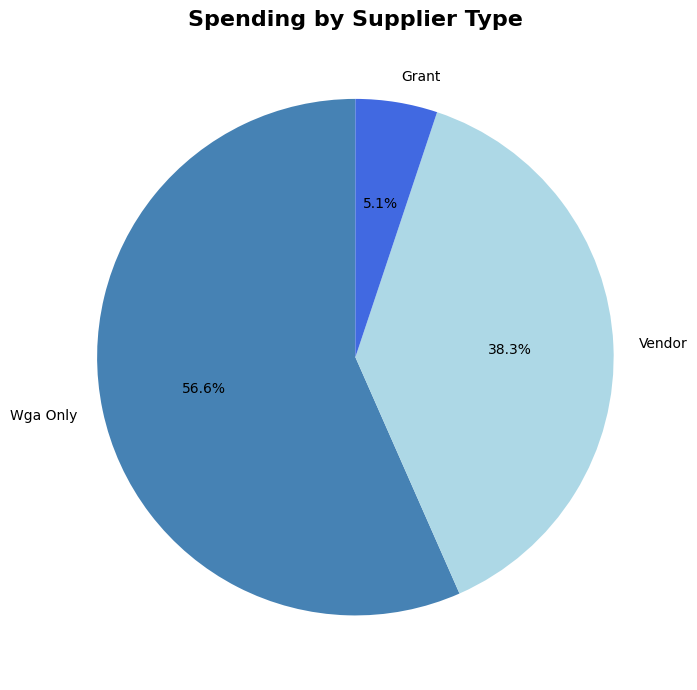

In [4]:

# Plot pie chart
fig, ax = plt.subplots(figsize=(10, 7))

ax.pie(supplier_type_spend['Amount'], 
       labels=supplier_type_spend['Supplier Type'],
       autopct='%1.1f%%',
       colors=['steelblue', 'lightblue', 'royalblue', 'skyblue'],
       startangle=90)

ax.set_title('Spending by Supplier Type', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

# What's the average transaction size per supplier type?

In [7]:
supplier_type_spend = df.groupby('Supplier Type')['Amount'].mean().reset_index()
supplier_type_spend = supplier_type_spend.sort_values('Amount', ascending=False)

# Adding percentage column
supplier_type_spend['Percentage'] = (supplier_type_spend['Amount'] / supplier_type_spend['Amount'].sum() * 100).round(2)

print("Average Spend by Supplier Type:")
print(supplier_type_spend)

Average Spend by Supplier Type:
  Supplier Type        Amount  Percentage
2      Wga Only  2.717303e+07       72.64
1        Vendor  7.536842e+06       20.15
0         Grant  2.695701e+06        7.21


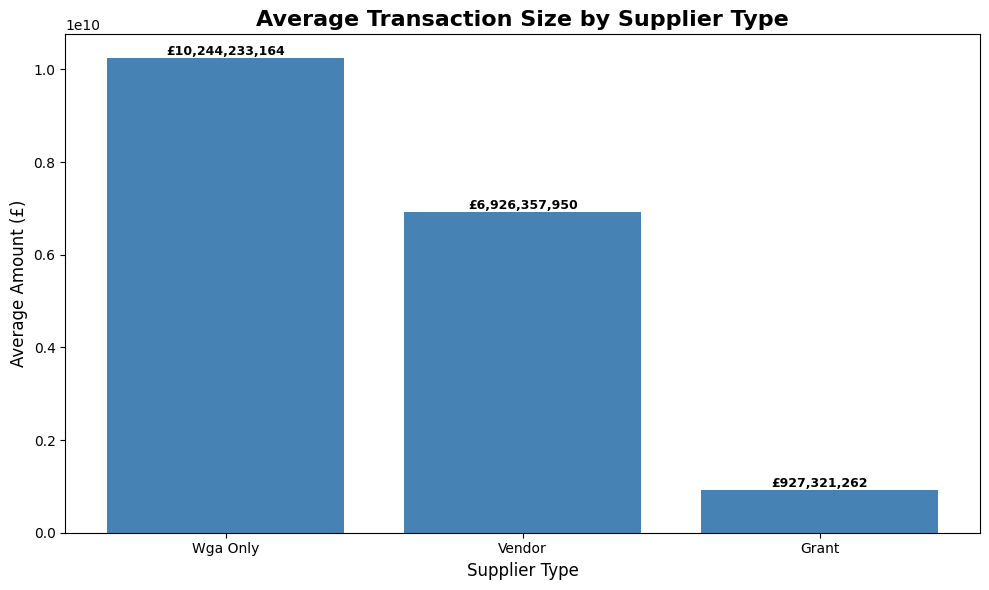

In [5]:

# Plot bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(supplier_type_spend['Supplier Type'], supplier_type_spend['Amount'], color='steelblue')

# Add labels and title
ax.set_title('Average Transaction Size by Supplier Type', fontsize=16, fontweight='bold')
ax.set_xlabel('Supplier Type', fontsize=12)
ax.set_ylabel('Average Amount (£)', fontsize=12)

# Add value labels on top of bars
for bar, amount in zip(bars, supplier_type_spend['Amount']):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
            f'£{amount:,.0f}', va='bottom', ha='center',
            fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# Find the dominant supplier type
dominant = supplier_type_spend.iloc[0]

print(f"🏆 Dominant Supplier Type: {dominant['Supplier Type']}")
print(f" Total Spend: £{dominant['Amount']:,.2f}")
print(f" Percentage of Budget: {dominant['Percentage']}%")

# Simple conclusion
if dominant['Percentage'] > 50:
    print(f"\n✅ {dominant['Supplier Type']} DOMINATES spending with more than 50% of total budget!")
else:
    print(f"\n✅ Spending is relatively DISTRIBUTED across supplier types")

🏆 Dominant Supplier Type: Wga Only
💰 Total Spend: £27,173,032.27
📊 Percentage of Budget: 72.64%

✅ Wga Only DOMINATES spending with more than 50% of total budget!
